## Evaluation of trained models

In [191]:
import sys
data_dir = '../data'
src_path = '../src'
test_dir = '../data/processed/sf/all/test'
if src_path not in sys.path:
    sys.path.append(src_path)

In [192]:
import loading as ld
import trained_model as tm
import importlib
importlib.reload(tm)
importlib.reload(ld)

<module 'loading' from '../src/loading.py'>

In [193]:
test = ld.load_test_generator(test_dir, img_shape=(128, 128, 3))

Found 205 images belonging to 2 classes.


## Models

I wrote the class `TrainedModel` to load tensorflow models from the weights caluclated when training, view the source code [here](../src/trained_model)

In [194]:
model_dir = '../models/gs_results'
model_id = 'best_c1_gs'

In [195]:
clf = tm.TrainedModel(model_dir, model_id)

In [189]:
clf.model.summary()

Model: "conv_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv_0 (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 64, 64, 16)        0         
_________________________________________________________________
norm_0 (BatchNormalization)  (None, 64, 64, 16)        64        
_________________________________________________________________
conv_1 (Conv2D)              (None, 64, 64, 16)        2320      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 32, 32, 16)        0         
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 32, 32, 16)        64   

              precision    recall  f1-score   support

        real       0.61      0.65      0.63       109
        fake       0.57      0.53      0.55        96

    accuracy                           0.60       205
   macro avg       0.59      0.59      0.59       205
weighted avg       0.59      0.60      0.59       205



,Predicted Fake,Predicted Real
Actual Fake,71,38
Actual Real,45,51


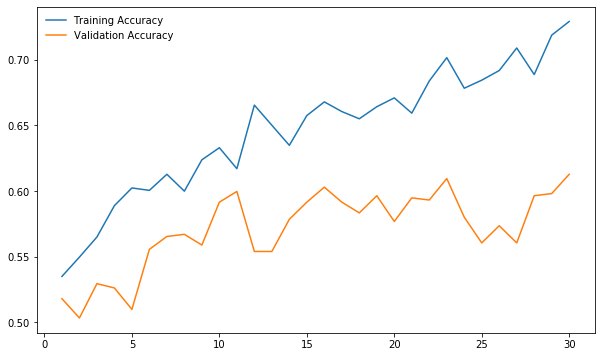

In [190]:
clf.plot_training()
clf.classification_report(test)
clf.conf_matrix(test)

I created some functinoality within the trained model class to test the model. This works by showing the model 2 pictures and asking it which one is the fake one. The score is given by how many the model gets correct. In this way the underlying frequency of fake/real images is not important.

In [124]:
easy_score = clf.test_on_difficulty(test_dir, dif='easy', tests=500)
medium_score = clf.test_on_difficulty(test_dir, dif='mid', tests=500)
hard_score = clf.test_on_difficulty(test_dir, dif='hard', tests=500)

print('easy score', easy_score)
print('medium score', medium_score)
print('hard score', hard_score)

easy score 0.556
medium score 0.628
hard score 0.584
